In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from typing import List

In [2]:
def smooth(time_series: list, smooth_size: int):
    if len(time_series) < smooth_size:
        return np.cumsum(time_series) / np.arange(1, len(time_series) + 1)
    
    cs = np.cumsum(time_series)
    return np.append(
        np.cumsum(time_series[:smooth_size]) / np.arange(1, smooth_size + 1),
        (cs[smooth_size:] - cs[:-smooth_size]) / smooth_size
    )

def graph_win_rate(model_names: List[str], save=True, max_iterations=float('inf'), smooth_size=1):

    plt.figure(facecolor='white', figsize=(12, 5))
    plt.title(f'{len(model_names)} models learning progress (against random model)')
    plt.xlabel('Games Played')
    plt.ylabel('Win rate')
    for name in model_names:
        with open(f'../{name}/stats.pkl', 'rb') as f:
            data = pickle.load(f)
        iterations = [x['iterations'] for x in data if x['iterations'] < max_iterations]
        win_rates = [x['win_counts'] for x in data if x['iterations'] < max_iterations]
        win_rates = smooth(win_rates, smooth_size)
        plt.plot(iterations, win_rates, label=name, alpha=0.6)
        plt.legend()
    if len(model_names) == 1:
        plt.savefig(f'../{model_names[0]}/win_rate.png')

def graph_apd(model_names: List[str], save=True, max_iterations=float('inf'), smooth_size=1, label_names: List[str] = None):
    plt.figure(facecolor='white', figsize=(12, 5))
    plt.xlabel('Games Played')
    plt.ylabel('Average Point Difference')
    for i, name in enumerate(model_names):
        with open(f'../{name}/stats.pkl', 'rb') as f:
            data = pickle.load(f)
        iterations = [x['iterations'] for x in data if x['iterations'] < max_iterations]
        apd = [x['avg_points'][0] - x['avg_points'][1] for x in data if x['iterations'] < max_iterations]
        apd = smooth(apd, smooth_size)
        plt.plot(iterations, apd, alpha=0.6, label=label_names[i] if label_names else name)
    plt.legend()

    if len(model_names) == 1:
        plt.savefig(f'../{model_names[0]}/apd.png')

def graph_level_rate(model_names: List[str], save=True, max_iterations=float('inf'), smooth_size=1, label_names: List[str] = None):
    plt.figure(facecolor='white', figsize=(12, 5))
    plt.xlabel('Games Played')
    plt.ylabel('Adjusted Win Rate (AWR)')
    for i, name in enumerate(model_names):
        with open(f'../{name}/stats.pkl', 'rb') as f:
            data = pickle.load(f)
        iterations = [x['iterations'] for x in data if x['iterations'] < max_iterations]
        level_rates = [x['level_counts'] for x in data if x['iterations'] < max_iterations]
        level_rates = smooth(level_rates, smooth_size)
        plt.plot(iterations, level_rates, alpha=0.6, label=label_names[i] if label_names else name)
        plt.legend()

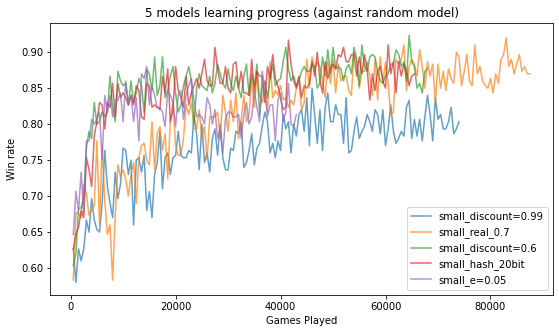

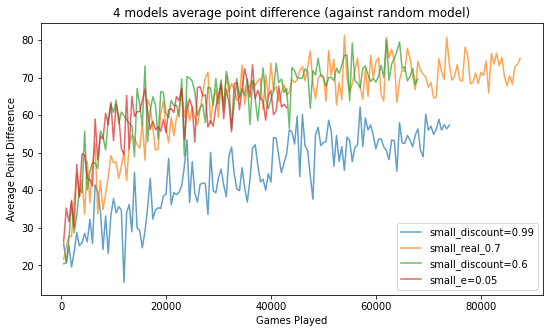

In [10]:
graph_win_rate(['small_discount=0.99', 'small_real_0.7', 'small_discount=0.6', 'small_hash_20bit', 'small_e=0.05'])
graph_apd(['small_discount=0.99',  'small_real_0.7', 'small_discount=0.6', 'small_e=0.05'])

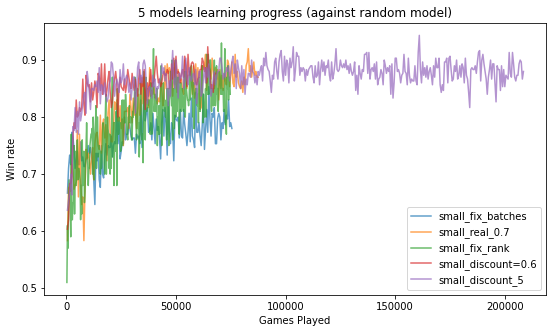

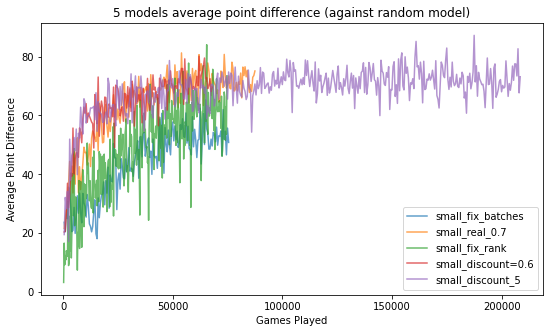

In [9]:
graph_win_rate(['small_fix_batches', 'small_real_0.7', 'small_fix_rank', 'small_discount=0.6', 'small_discount_5'])
graph_apd(['small_fix_batches', 'small_real_0.7', 'small_fix_rank', 'small_discount=0.6', 'small_discount_5'])

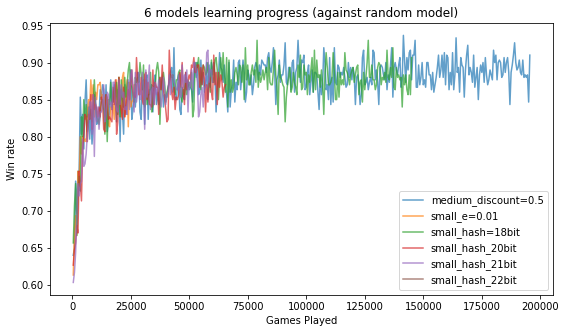

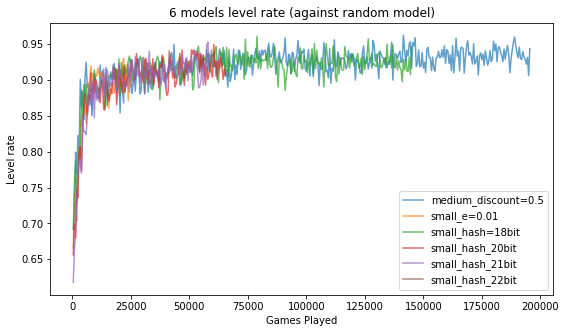

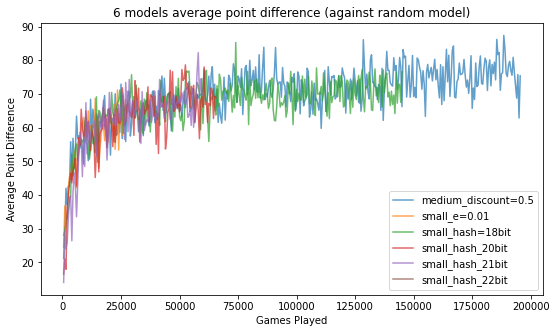

In [4]:
graph_win_rate(['medium_discount=0.5','small_e=0.01', 'small_hash=18bit', 'small_hash_20bit', 'small_hash_21bit', 'small_hash_22bit'])
graph_level_rate(['medium_discount=0.5', 'small_e=0.01', 'small_hash=18bit', 'small_hash_20bit', 'small_hash_21bit', 'small_hash_22bit'])
graph_apd(['medium_discount=0.5', 'small_e=0.01', 'small_hash=18bit', 'small_hash_20bit', 'small_hash_21bit', 'small_hash_22bit'])

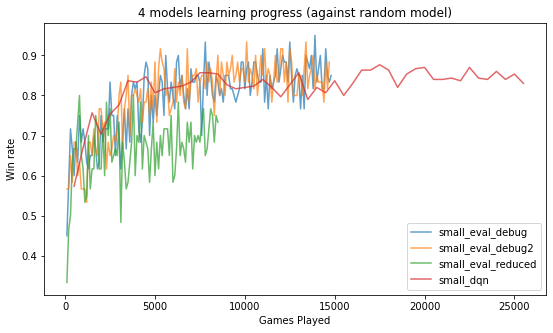

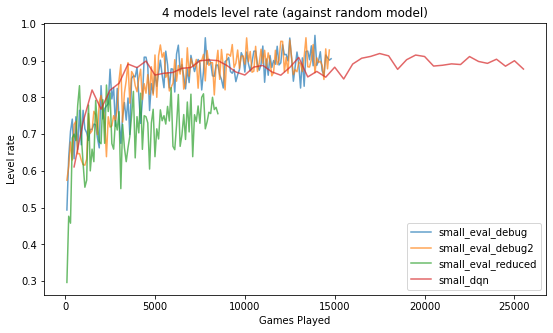

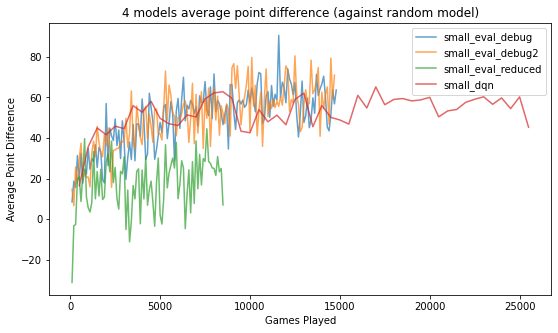

In [7]:
graph_win_rate(['small_eval_debug', 'small_eval_debug2', 'small_eval_reduced', 'small_dqn'])
graph_level_rate(['small_eval_debug', 'small_eval_debug2', 'small_eval_reduced', 'small_dqn'])
graph_apd(['small_eval_debug', 'small_eval_debug2', 'small_eval_reduced', 'small_dqn'])

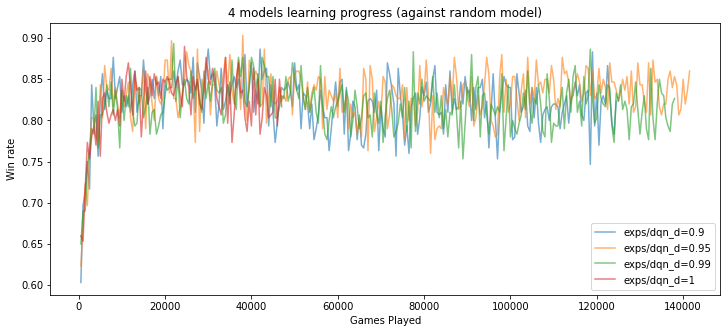

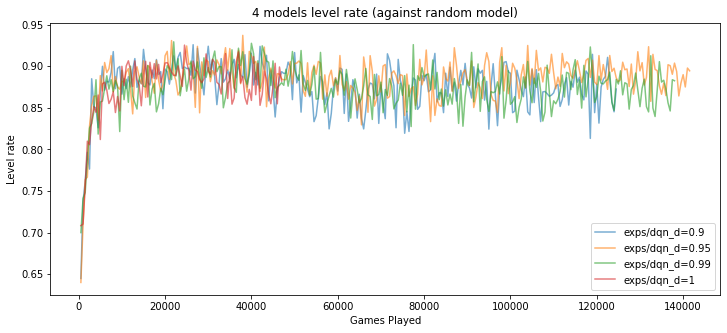

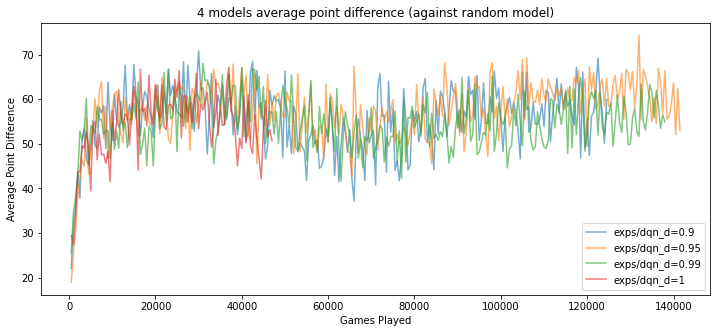

In [23]:
model_names = ['exps/dqn_d=0.9', 'exps/dqn_d=0.95', 'exps/dqn_d=0.99', 'exps/dqn_d=1']
graph_win_rate(model_names, max_iterations=200000)
graph_level_rate(model_names, max_iterations=200000)
graph_apd(model_names, max_iterations=200000)

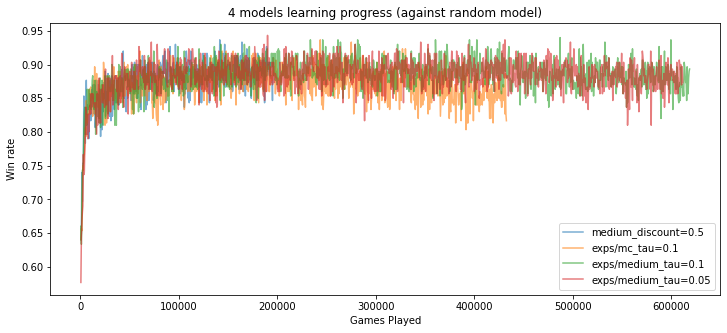

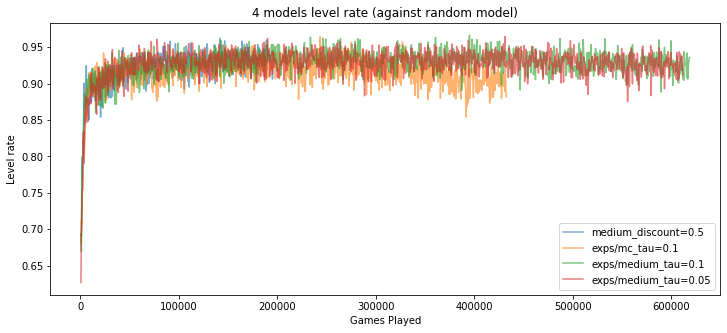

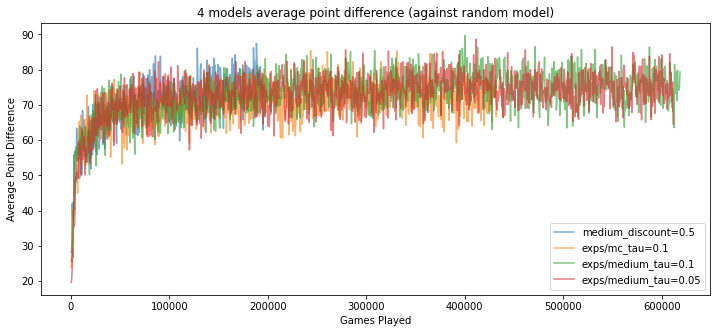

In [11]:
model_names = ['medium_discount=0.5', 'exps/mc_tau=0.1', 'exps/medium_tau=0.1', 'exps/medium_tau=0.05']
graph_win_rate(model_names)
graph_level_rate(model_names)
graph_apd(model_names)

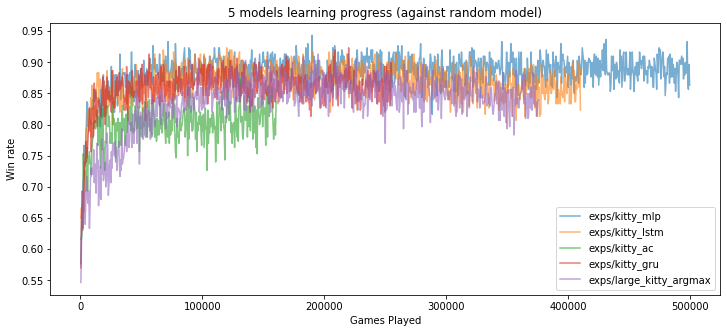

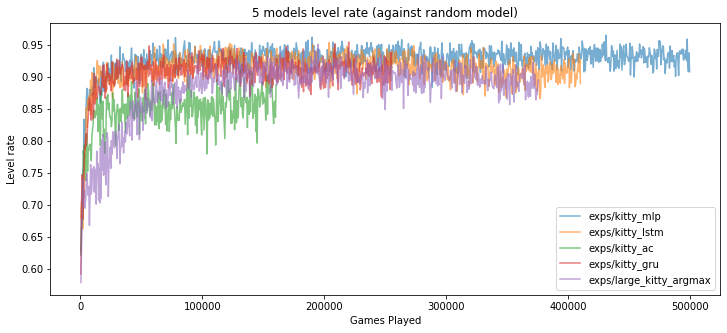

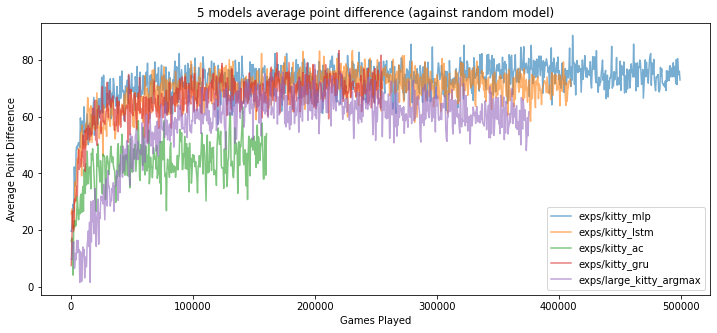

In [6]:
model_names = ['exps/kitty_mlp', 'exps/kitty_lstm', 'exps/kitty_ac', 'exps/kitty_gru', 'exps/large_kitty_argmax']
graph_win_rate(model_names, max_iterations=500000)
graph_level_rate(model_names, max_iterations=500000)
# plt.savefig('kitty.png', bbox_inches='tight', dpi=160)
graph_apd(model_names, max_iterations=500000)

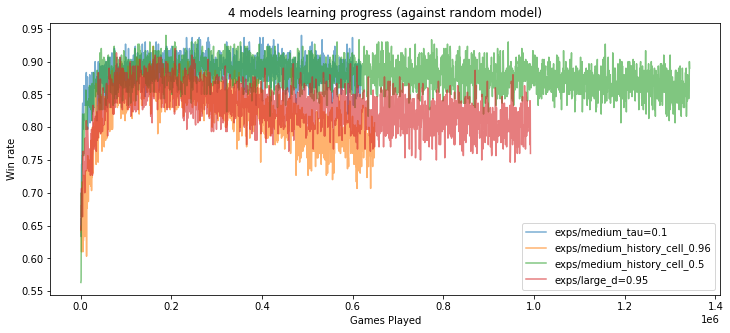

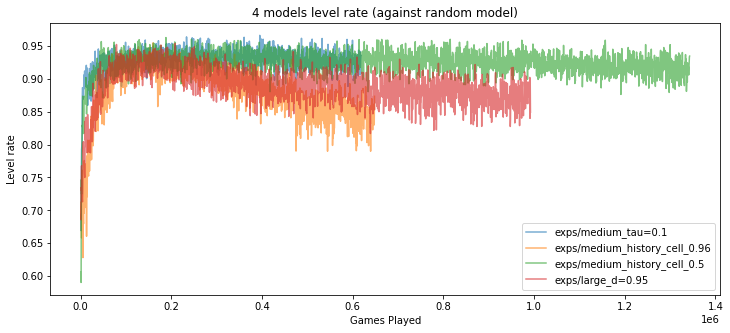

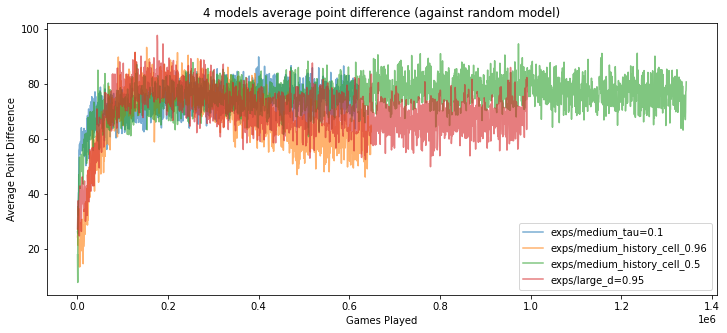

In [9]:
model_names = ['exps/medium_tau=0.1', 'exps/medium_history_cell_0.96', 'exps/medium_history_cell_0.5', 'exps/large_d=0.95']
graph_win_rate(model_names, max_iterations=5000000)
graph_level_rate(model_names, max_iterations=5000000)
graph_apd(model_names, max_iterations=5000000)

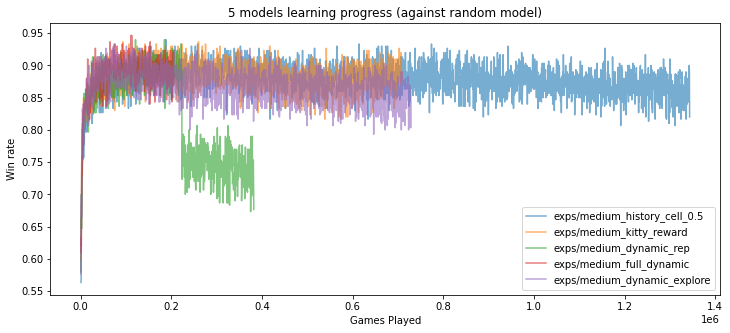

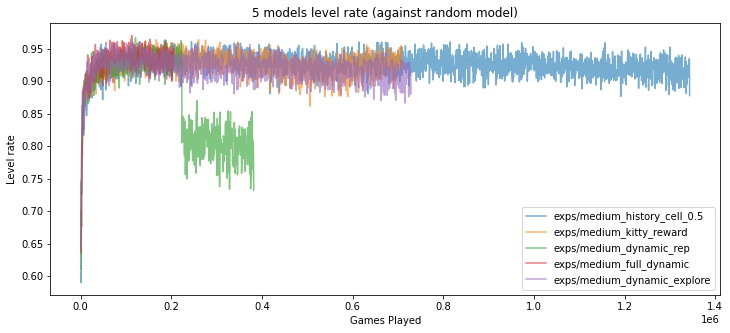

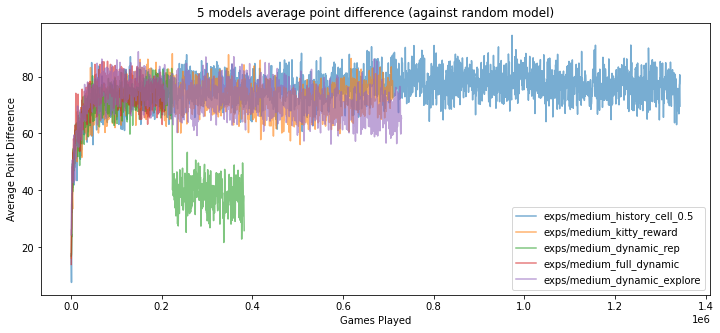

In [8]:
model_names = ['exps/medium_history_cell_0.5', 'exps/medium_kitty_reward', 'exps/medium_dynamic_rep', 'exps/medium_full_dynamic', 'exps/medium_dynamic_explore']
graph_win_rate(model_names, max_iterations=5000000)
graph_level_rate(model_names, max_iterations=5000000)
graph_apd(model_names, max_iterations=5000000)

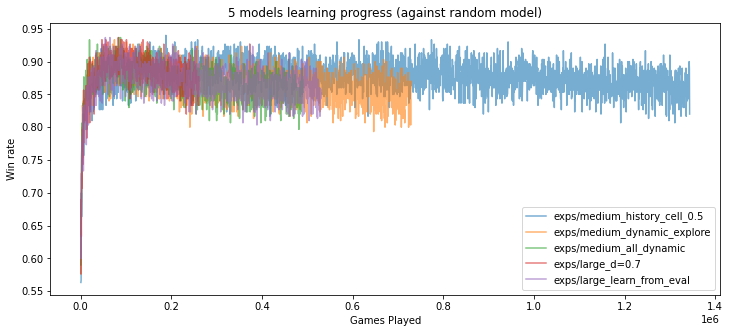

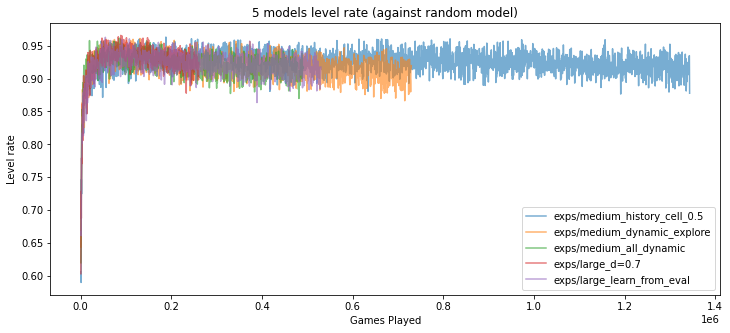

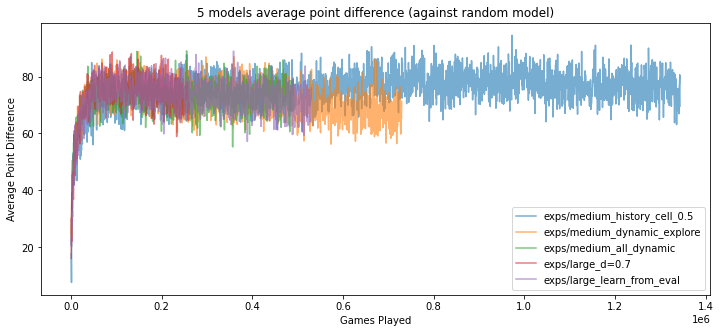

In [7]:
model_names = ["exps/medium_history_cell_0.5", 'exps/medium_dynamic_explore', 'exps/medium_all_dynamic', 'exps/large_d=0.7', 'exps/large_learn_from_eval']
graph_win_rate(model_names, max_iterations=5000000)
graph_level_rate(model_names, max_iterations=5000000)
graph_apd(model_names, max_iterations=5000000)

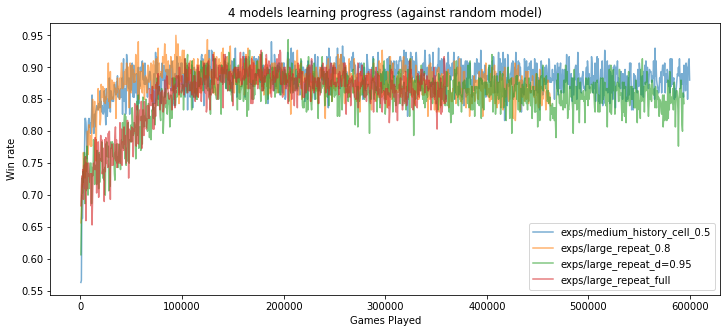

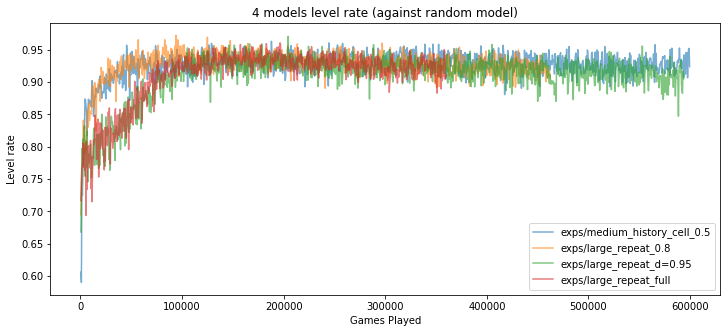

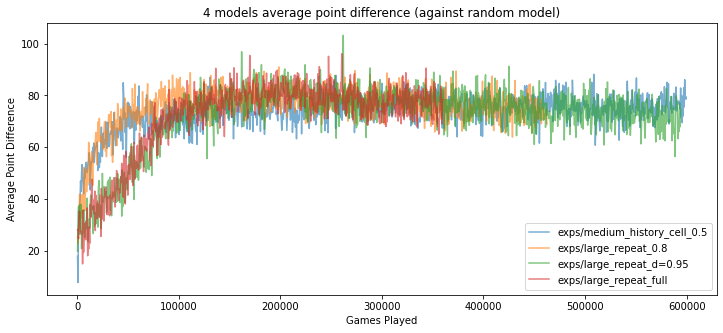

In [3]:
model_names = ["exps/medium_history_cell_0.5", 'exps/large_repeat_0.8', 'exps/large_repeat_d=0.95', 'exps/large_repeat_full']
graph_win_rate(model_names, max_iterations=600000)
graph_level_rate(model_names, max_iterations=600000)
graph_apd(model_names, max_iterations=600000)

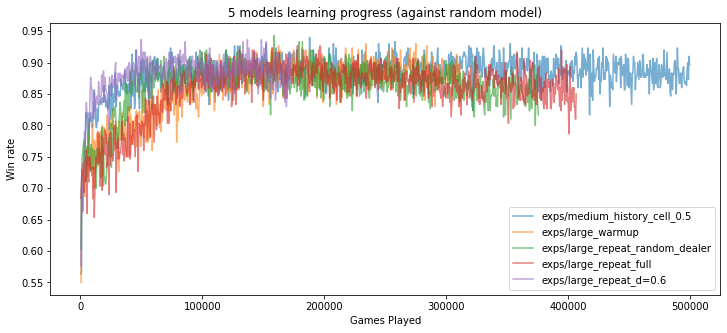

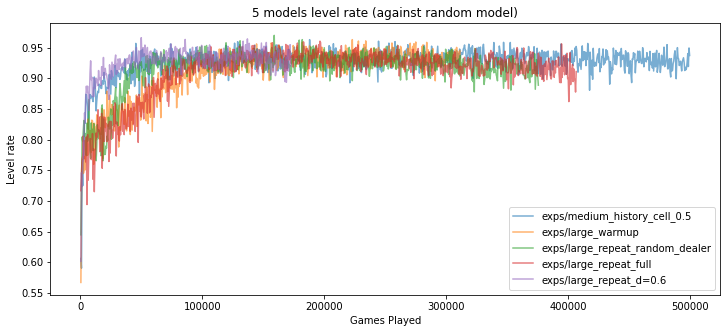

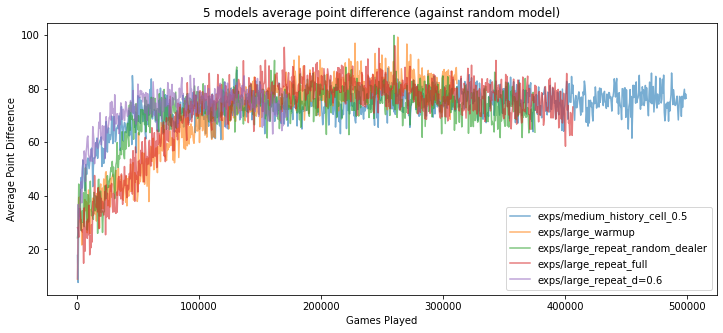

In [8]:
model_names = ['exps/medium_history_cell_0.5', "exps/large_warmup", "exps/large_repeat_random_dealer", "exps/large_repeat_full", "exps/large_repeat_d=0.6"]
graph_win_rate(model_names, max_iterations=500000)
graph_level_rate(model_names, max_iterations=500000)
graph_apd(model_names, max_iterations=500000)

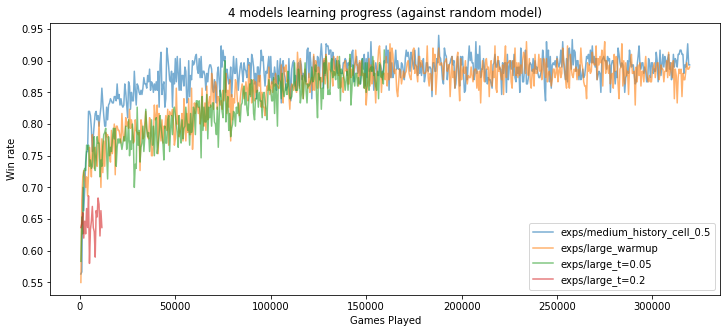

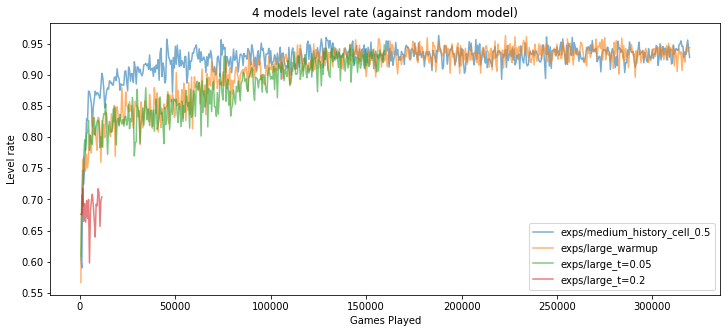

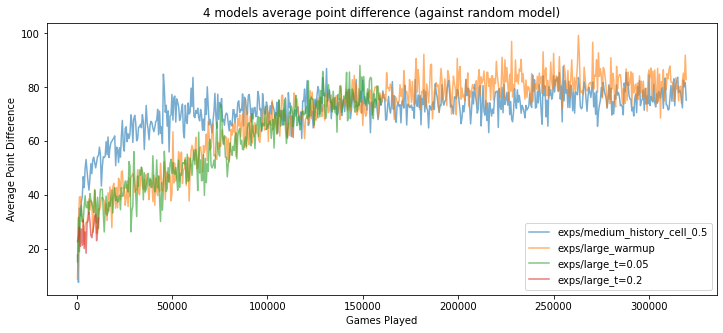

In [11]:
model_names = ['exps/medium_history_cell_0.5', "exps/large_warmup", "exps/large_t=0.05", "exps/large_t=0.2"]
graph_win_rate(model_names, max_iterations=320000)
graph_level_rate(model_names, max_iterations=320000)
graph_apd(model_names, max_iterations=320000)

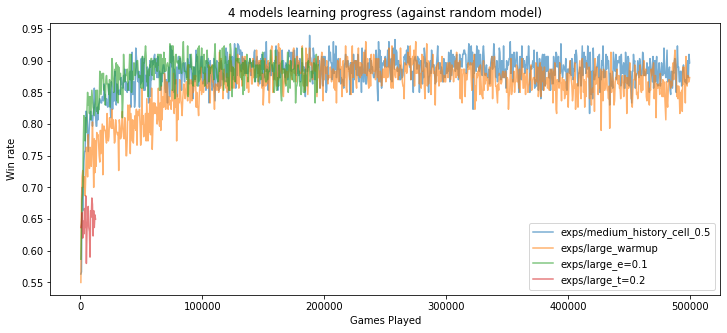

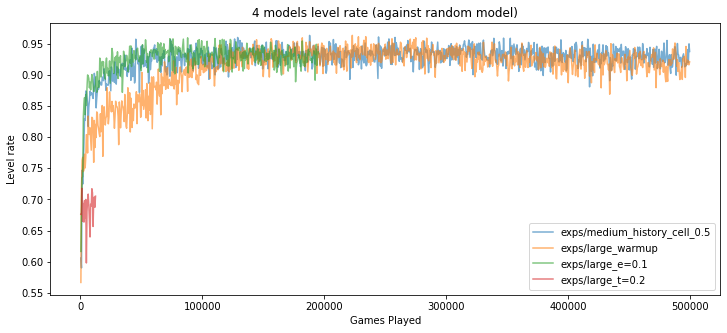

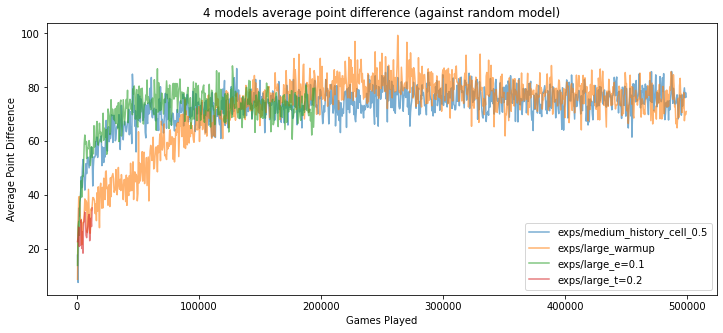

In [35]:
model_names = ['exps/medium_history_cell_0.5', "exps/large_warmup", "exps/large_e=0.1", "exps/large_t=0.2"]
graph_win_rate(model_names, max_iterations=500000)
graph_level_rate(model_names, max_iterations=500000)
graph_apd(model_names, max_iterations=500000)

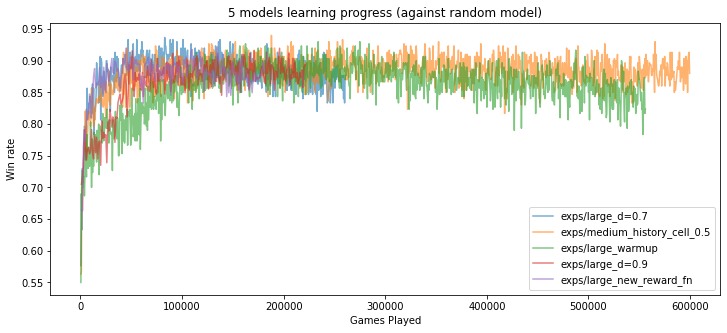

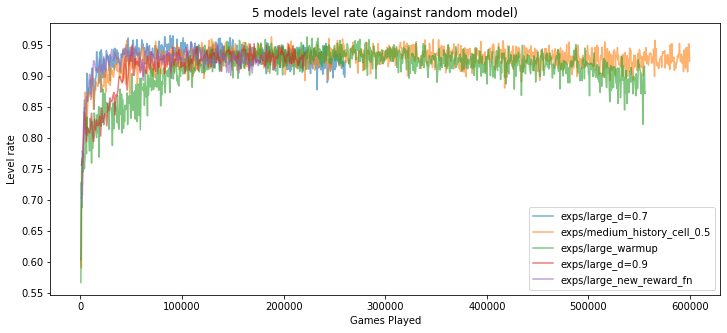

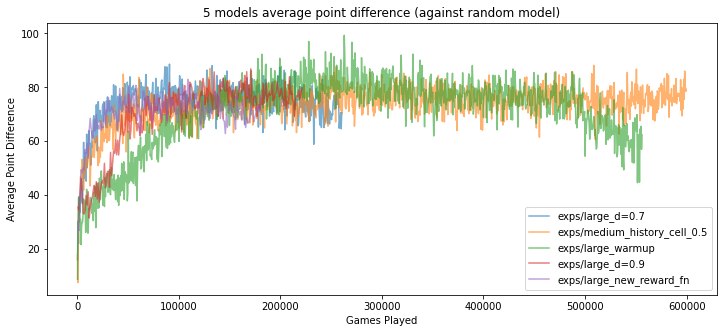

In [16]:
model_names = ['exps/large_d=0.7', 'exps/medium_history_cell_0.5', 'exps/large_warmup', 'exps/large_d=0.9', 'exps/large_new_reward_fn']
graph_win_rate(model_names, max_iterations=600000)
graph_level_rate(model_names, max_iterations=600000)
graph_apd(model_names, max_iterations=600000)

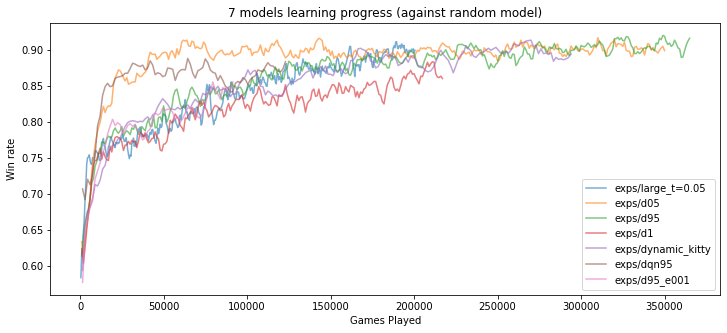

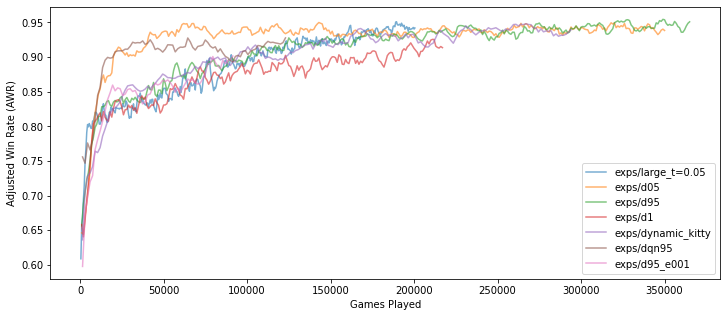

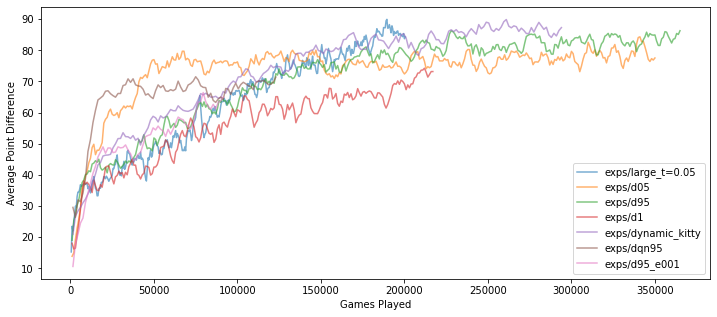

In [13]:
# Active models
model_names = ['exps/large_t=0.05', 'exps/d05', 'exps/d95', 'exps/d1', 'exps/dynamic_kitty', 'exps/dqn95', 'exps/d95_e001']
graph_win_rate(model_names, smooth_size=5)
graph_level_rate(model_names, smooth_size=5)
graph_apd(model_names, smooth_size=5)

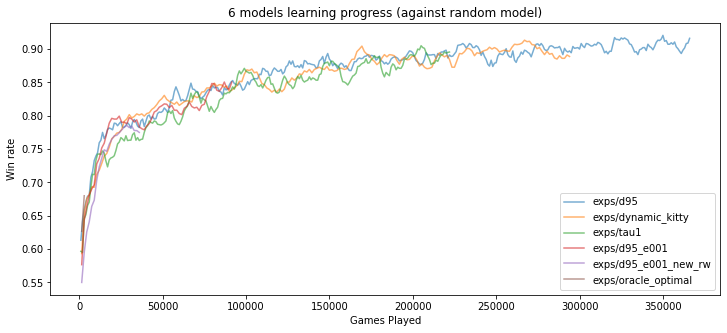

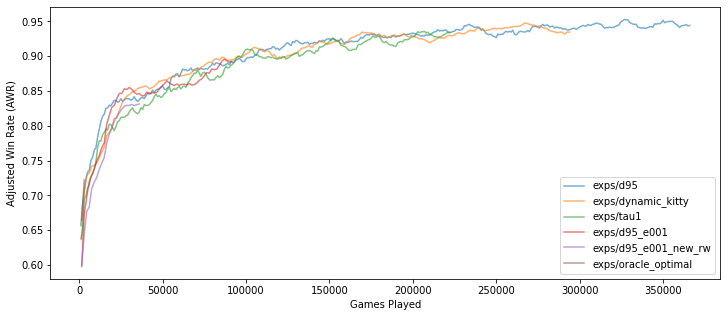

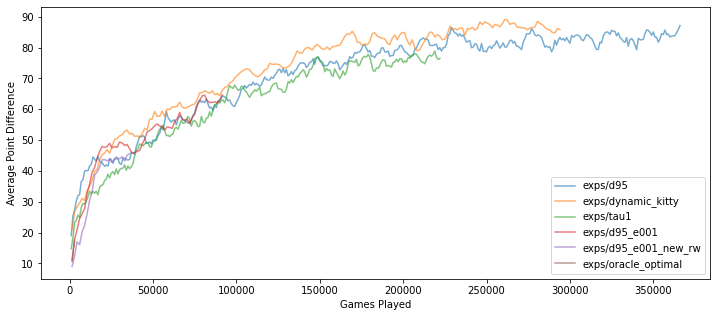

In [18]:
# Active models
model_names = ['exps/d95', 'exps/dynamic_kitty', 'exps/tau1', 'exps/d95_e001', 'exps/d95_e001_new_rw', 'exps/oracle_optimal']
graph_win_rate(model_names, smooth_size=6)
graph_level_rate(model_names, smooth_size=10)
graph_apd(model_names, smooth_size=6)

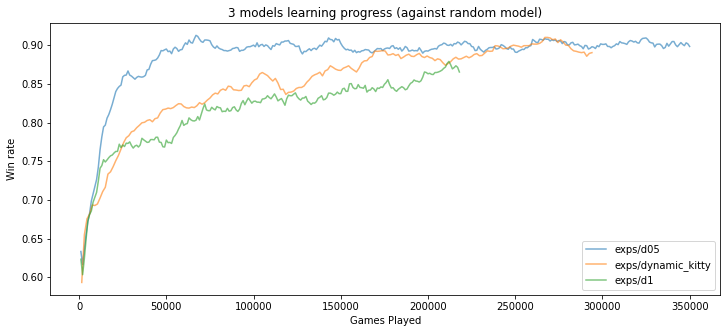

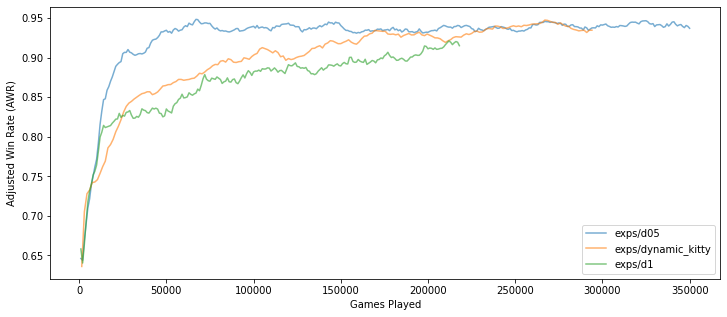

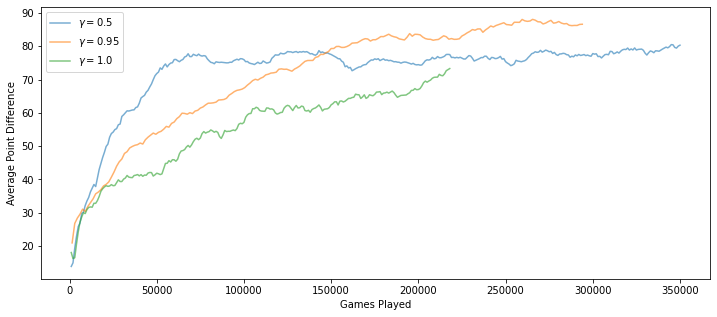

In [17]:
model_names = ['exps/d05', 'exps/dynamic_kitty', 'exps/d1']
graph_win_rate(model_names, smooth_size=10)
graph_level_rate(model_names, smooth_size=10)
graph_apd(model_names, smooth_size=15, label_names=[r'$\gamma=0.5$', r'$\gamma=0.95$', r'$\gamma=1.0$'])
# plt.savefig('discount.pdf', dpi=150, bbox_inches='tight')

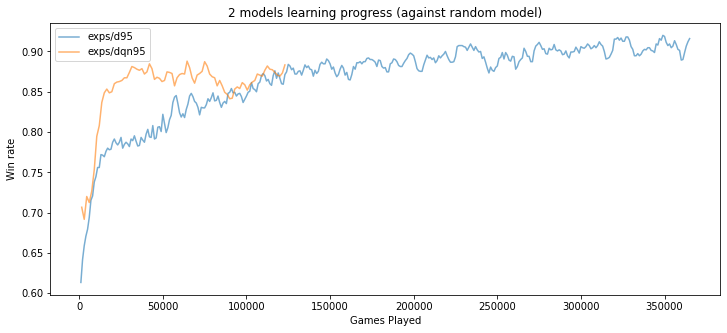

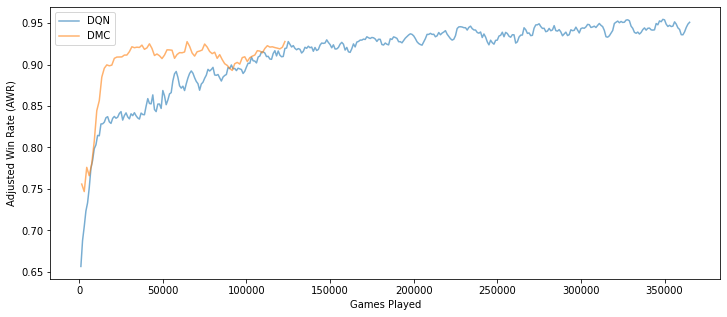

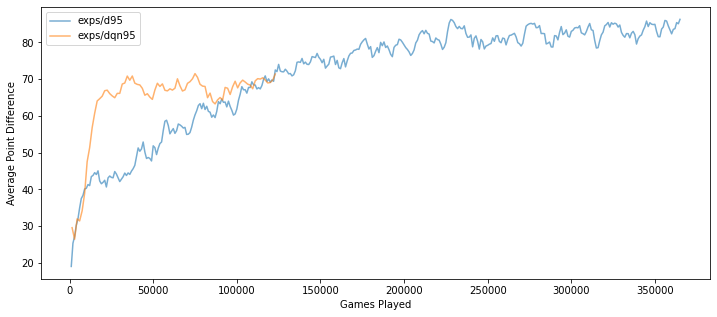

In [16]:
model_names = ['exps/d95', 'exps/dqn95']
graph_win_rate(model_names, smooth_size=5)
graph_level_rate(model_names, smooth_size=5, label_names=['DQN', 'DMC'])
plt.savefig('dqn.pdf', dpi=150, bbox_inches='tight')
graph_apd(model_names, smooth_size=5)